# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [2]:
df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1


''

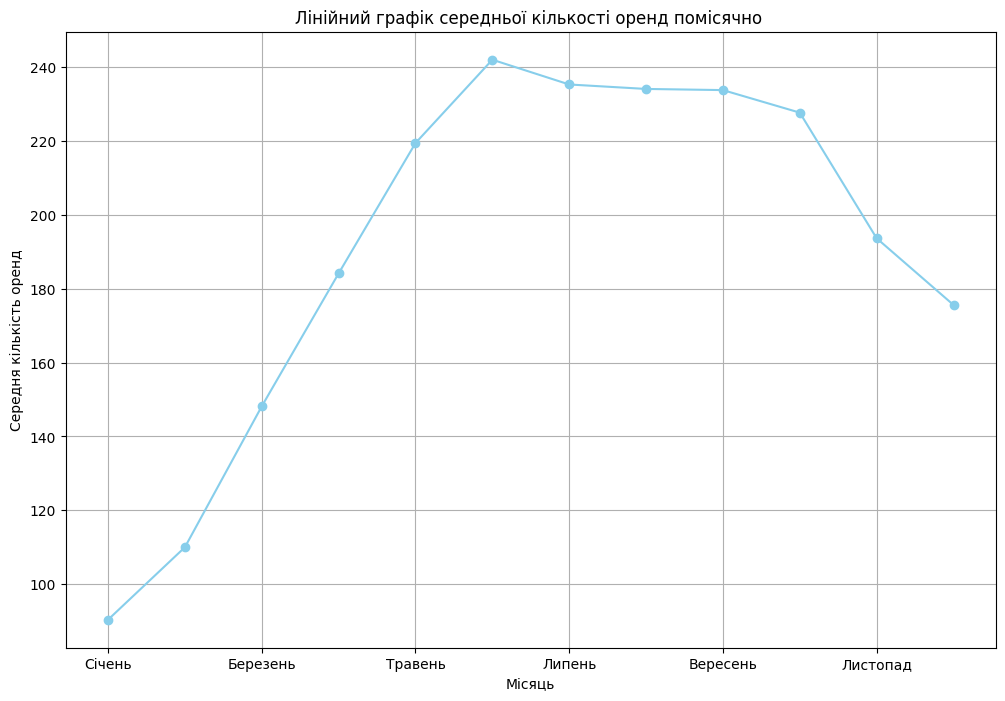

In [3]:
avg_month = df.groupby('month')['count'].mean().sort_index()
month_names = {
    1:'Січень',
    2:'Лютий',
    3:'Березень',
    4:'Квітень',
    5: 'Травень',
    6: 'Червень',
    7: 'Липень',
    8: 'Серпень',
    9: 'Вересень',
    10: 'Жовтень',
    11: 'Листопад',
    12: 'Грудень'
}
avg_month.index = avg_month.index.map(month_names)
ax1 = avg_month.plot(
    figsize = (12, 8),
    style='-o',
    color='skyblue'
)
ax1.set_title('Лінійний графік середньої кількості оренд помісячно ')
ax1.set_xlabel('Місяць')
ax1.set_ylabel('Середня кількіcть оренд')
ax1.grid(True)
;

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(avg_month.index, avg_month.values, '-o', color='skyblue')
plt.grid(True)
plt.title('Лінійний графік середньої кількості оренд помісячно ')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.show()

Дані були згруповані за місяцями з обчисленням середнього значення оренд за кожен місяць упродовж усіх років. Для візуалізації було використано два підходи: за допомогою Pandas та безпосередньо через Matplotlib. Обидва графіки демонструють сезонну динаміку оренди велосипедів із піком у літні місяці та спадом узимку.

Порівнюючи два методи, як на мене, то код методом Pandas зрозуміліший(можливо з ним більше мала справу), але візуалізація методом Matplotlib здається кращою - підписані всі місяці та зображені горизонтальні та вертикальні сітки.


Але якщо потрібно прослідкувати тенденцію по місяцях та роках, не групуєси всі місяці за всі роки, то використовуємо інший код побудови візуалізації:

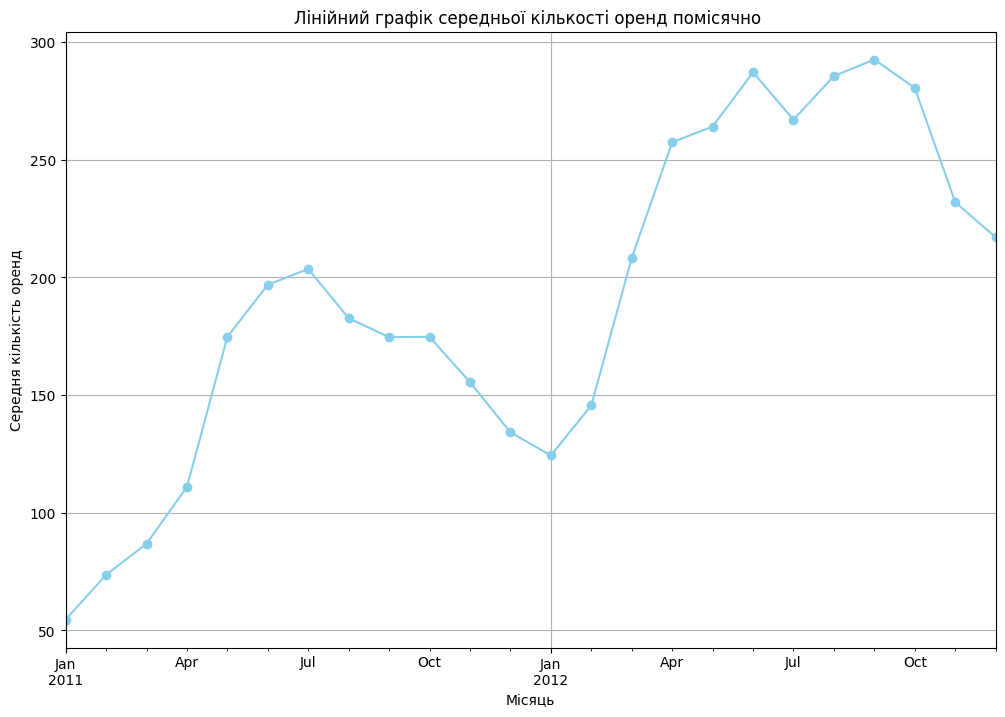

In [4]:
avg_month_time = df['count'].resample('ME').mean()
ax1_time = avg_month_time.plot(
    figsize=(12,8),
    style='-o',
    color='skyblue'
)
ax1_time.set_title('Лінійний графік середньої кількості оренд помісячно ')
ax1_time.set_xlabel('Місяць')
ax1_time.set_ylabel('Середня кількіcть оренд')
ax1_time.grid(True)

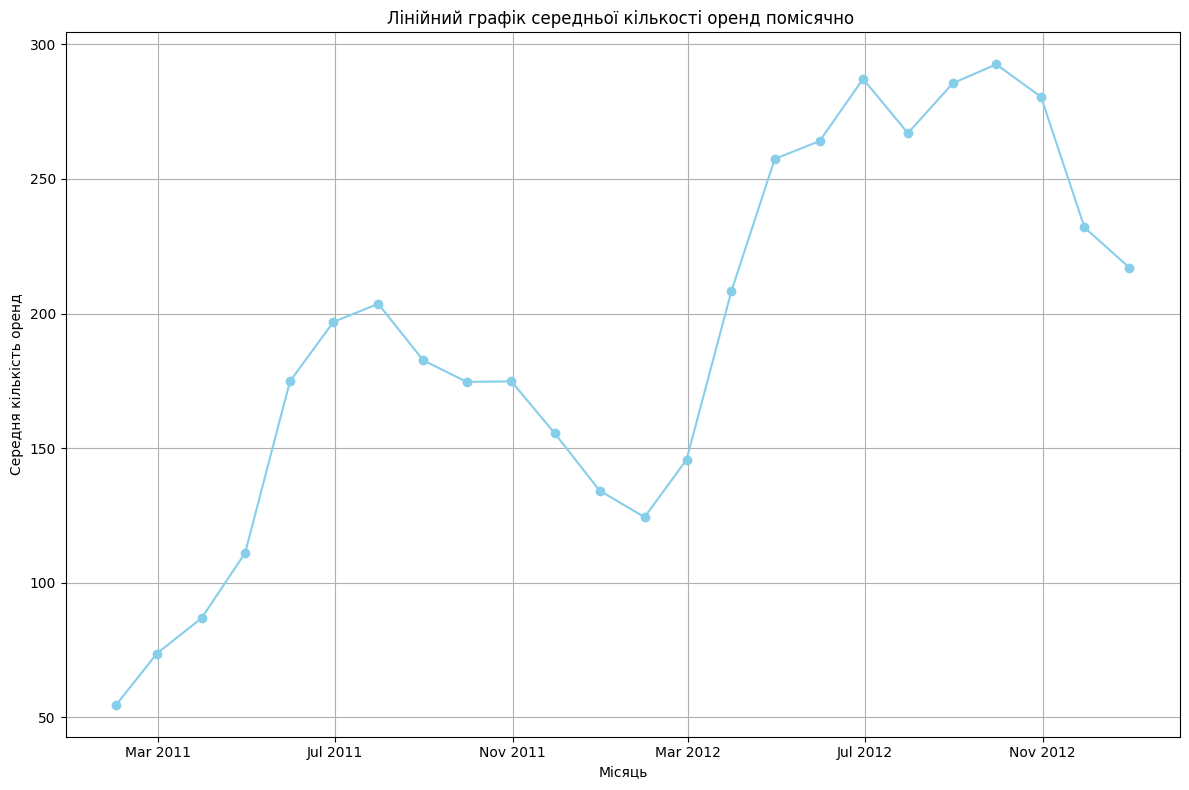

In [5]:
import matplotlib.dates as mdates
plt.figure(figsize=(12,8))
plt.plot(avg_month_time.index, avg_month_time.values, '-o', color='skyblue')
plt.grid(True)
plt.title('Лінійний графік середньої кількості оренд помісячно ')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))

plt.tight_layout()
plt.show()

Для аналізу динаміки оренди велосипедів у часі було використано агрегування даних по календарних місяцях за допомогою методу resample. Індекс datetime було збережено для коректного відображення часової послідовності без усереднення однакових місяців різних років.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [6]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

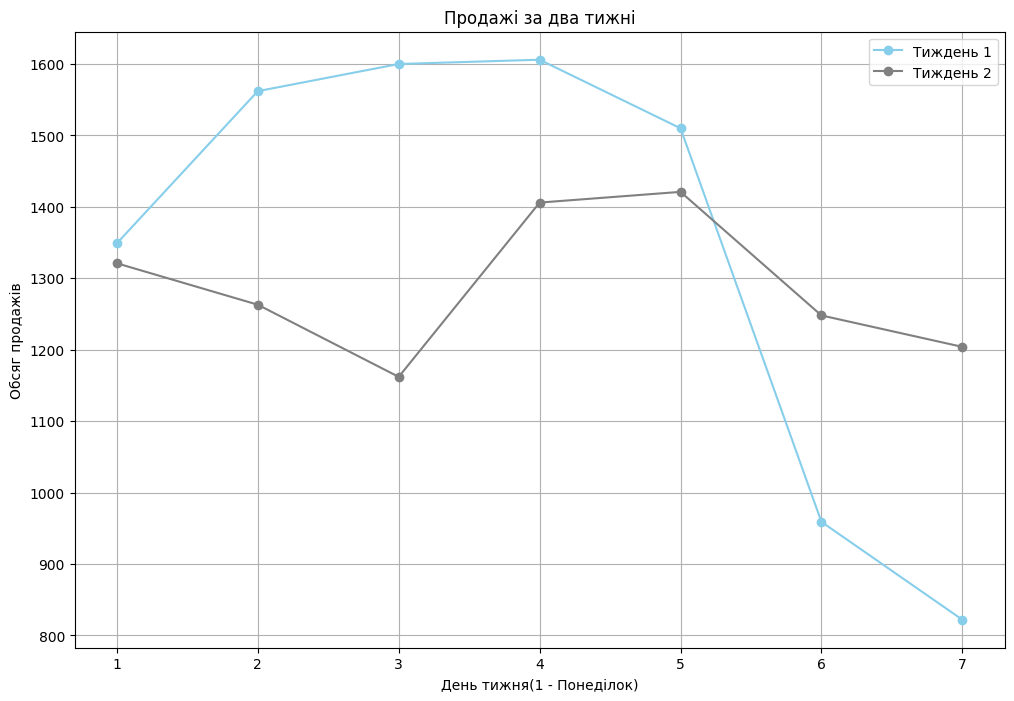

In [7]:
plt.figure(figsize=(12,8))
plt.plot(days, sales_week1, marker='o', color='skyblue', label='Тиждень 1')
plt.plot(days, sales_week2, marker='o', color='grey', label='Тиждень 2')
plt.title('Продажі за два тижні')
plt.xlabel('День тижня(1 - Понеділок)')
plt.ylabel('Обсяг продажів')
plt.grid(True)
plt.legend()
plt.show()

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [8]:
df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1


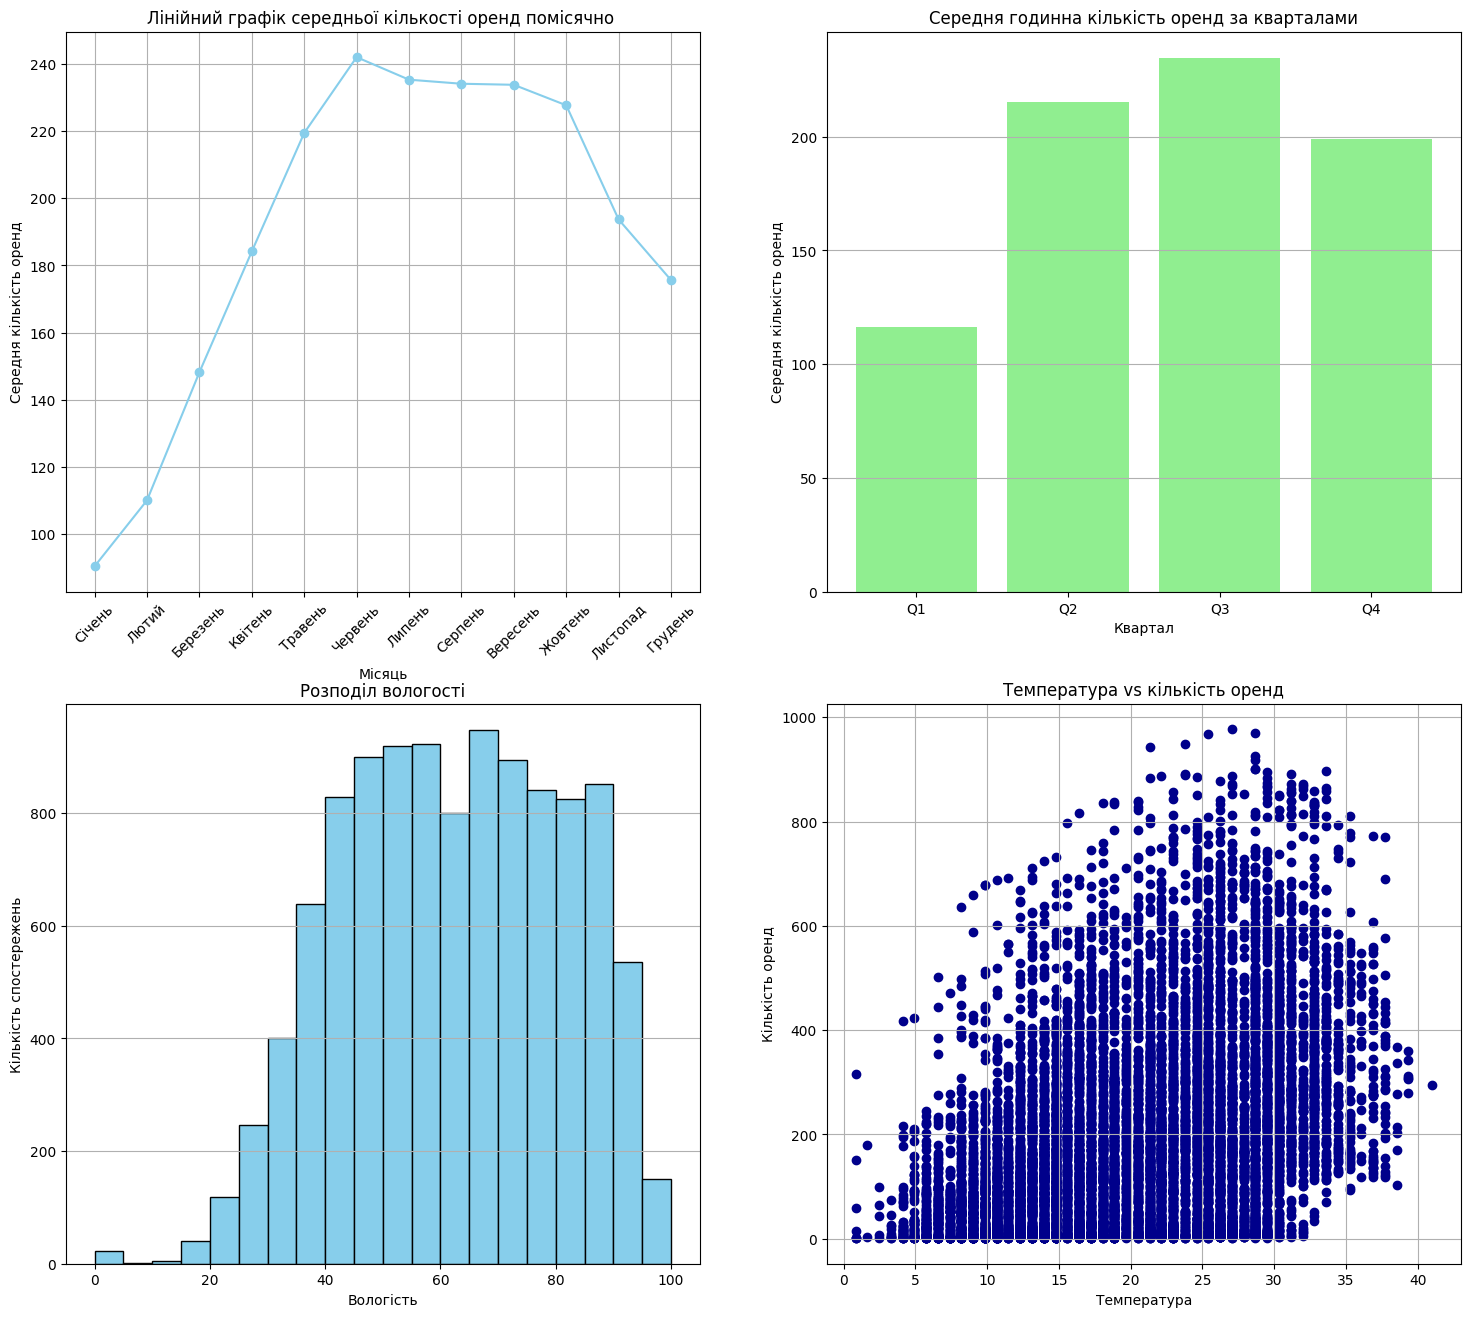

In [9]:
plt.figure(figsize=(18,16))

plt.subplot(2, 2, 1)
plt.plot(avg_month.index, avg_month.values, '-o', color='skyblue')
plt.grid(True)
plt.title('Лінійний графік середньої кількості оренд помісячно ')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.tick_params(axis='x', rotation=45)

avg_quater = df.groupby('season')['count'].mean()
quarter_names = {
    1: 'Q1',
    2: 'Q2',
    3: 'Q3',
    4: 'Q4'
}
avg_quater.index = avg_quater.index.map(quarter_names)
plt.subplot(2, 2, 2)
plt.bar(avg_quater.index, avg_quater.values, color='lightgreen')
plt.title('Середня годинна кількість оренд за кварталами')
plt.xlabel('Квартал')
plt.ylabel('Середня кількість оренд')
plt.grid(axis='y')

plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=20, color='skyblue',edgecolor='black')
plt.title('Розподіл вологості')
plt.xlabel('Вологість')
plt.ylabel('Кількість спостережень')
plt.grid(axis='y')

plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], color='darkblue')
plt.title('Температура vs кількість оренд')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.grid(True)

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

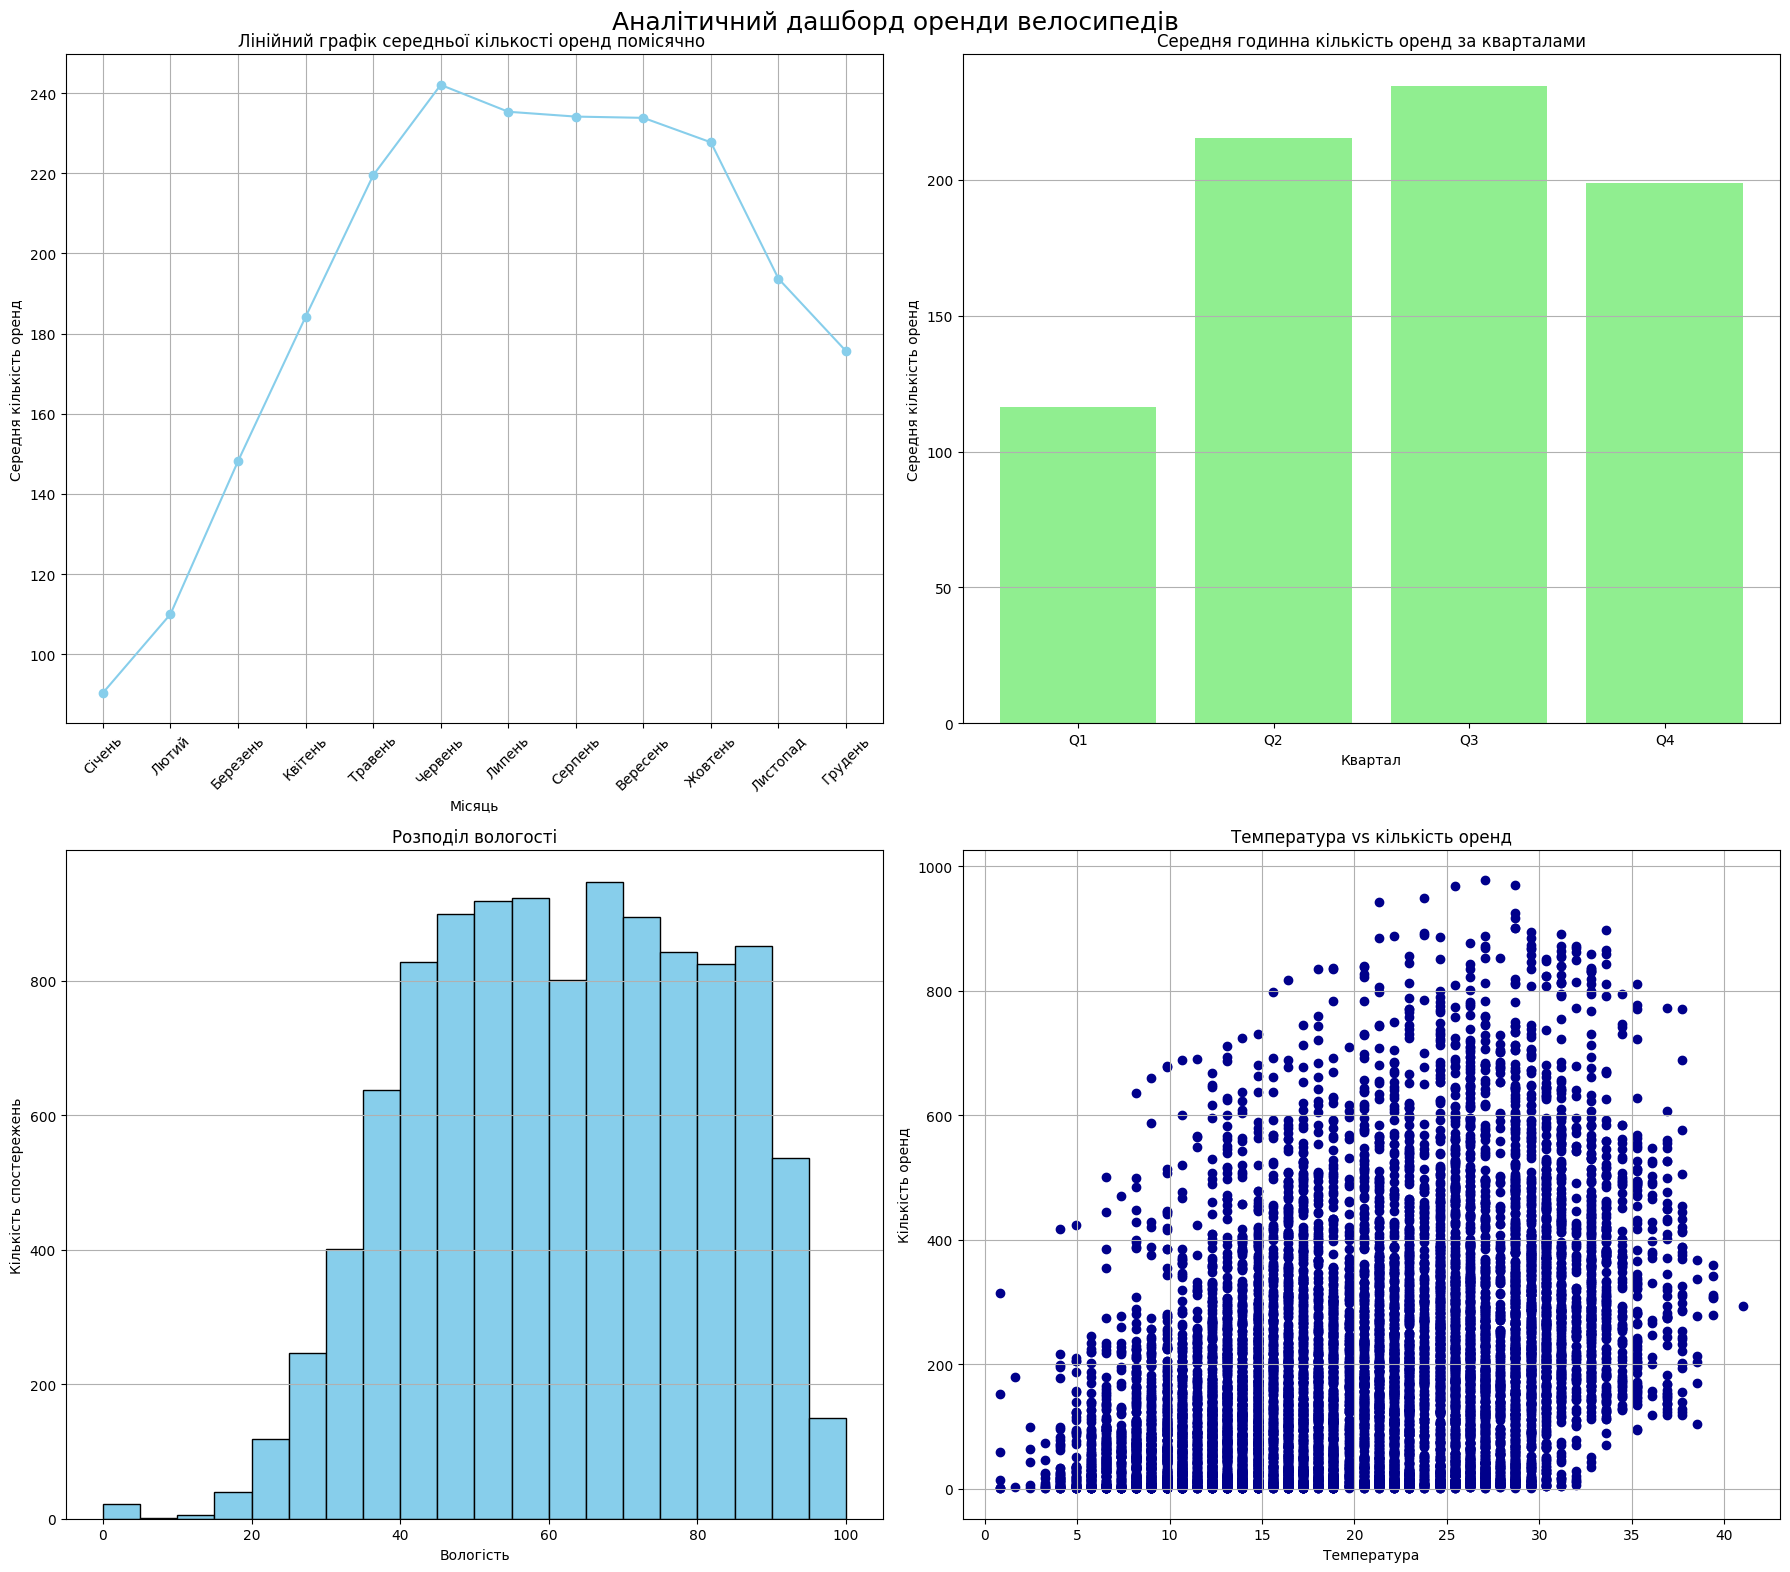

In [10]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots(2, 2, figsize=(18, 16))


ax[0, 0].plot(avg_month.index, avg_month.values, '-o', color='skyblue')
ax[0, 0].grid(True)
ax[0, 0].set_title('Лінійний графік середньої кількості оренд помісячно ')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Середня кількість оренд')
ax[0, 0].tick_params(axis='x', rotation=45)

avg_quater = df.groupby('season')['count'].mean()
quarter_names = {
    1: 'Q1',
    2: 'Q2',
    3: 'Q3',
    4: 'Q4'
}
avg_quater.index = avg_quater.index.map(quarter_names)

ax[0, 1].bar(avg_quater.index, avg_quater.values, color='lightgreen')
ax[0, 1].set_title('Середня годинна кількість оренд за кварталами')
ax[0, 1].set_xlabel('Квартал')
ax[0, 1].set_ylabel('Середня кількість оренд')
ax[0, 1].grid(axis='y')


ax[1, 0].hist(df['humidity'], bins=20, color='skyblue',edgecolor='black')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Кількість спостережень')
ax[1, 0].grid(axis='y')


ax[1, 1].scatter(df['temp'], df['count'], color='darkblue')
ax[1, 1].set_title('Температура vs кількість оренд')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренд')
ax[1, 1].grid(True)

fig.suptitle('Аналітичний дашборд оренди велосипедів', fontsize=18)
plt.tight_layout()
plt.show()

plt.subplot() — це підхід, де підграфіки створюються та активуються по черзі, і всі команди застосовуються до поточного графіка.
plt.subplots() — підхід, де вся сітка графіків створюється одразу, а кожен підграфік керується окремим обʼєктом, що робить код більш зручним і читабельним.

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

/var/folders/54/f2q7_m2x00v_zymhqt1q8_wr0000gn/T/ipykernel_3221/2050846125.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['count'].resample('M').agg(['mean', 'max', 'min'])


AttributeError: 'Text' object has no property 'fontweght'

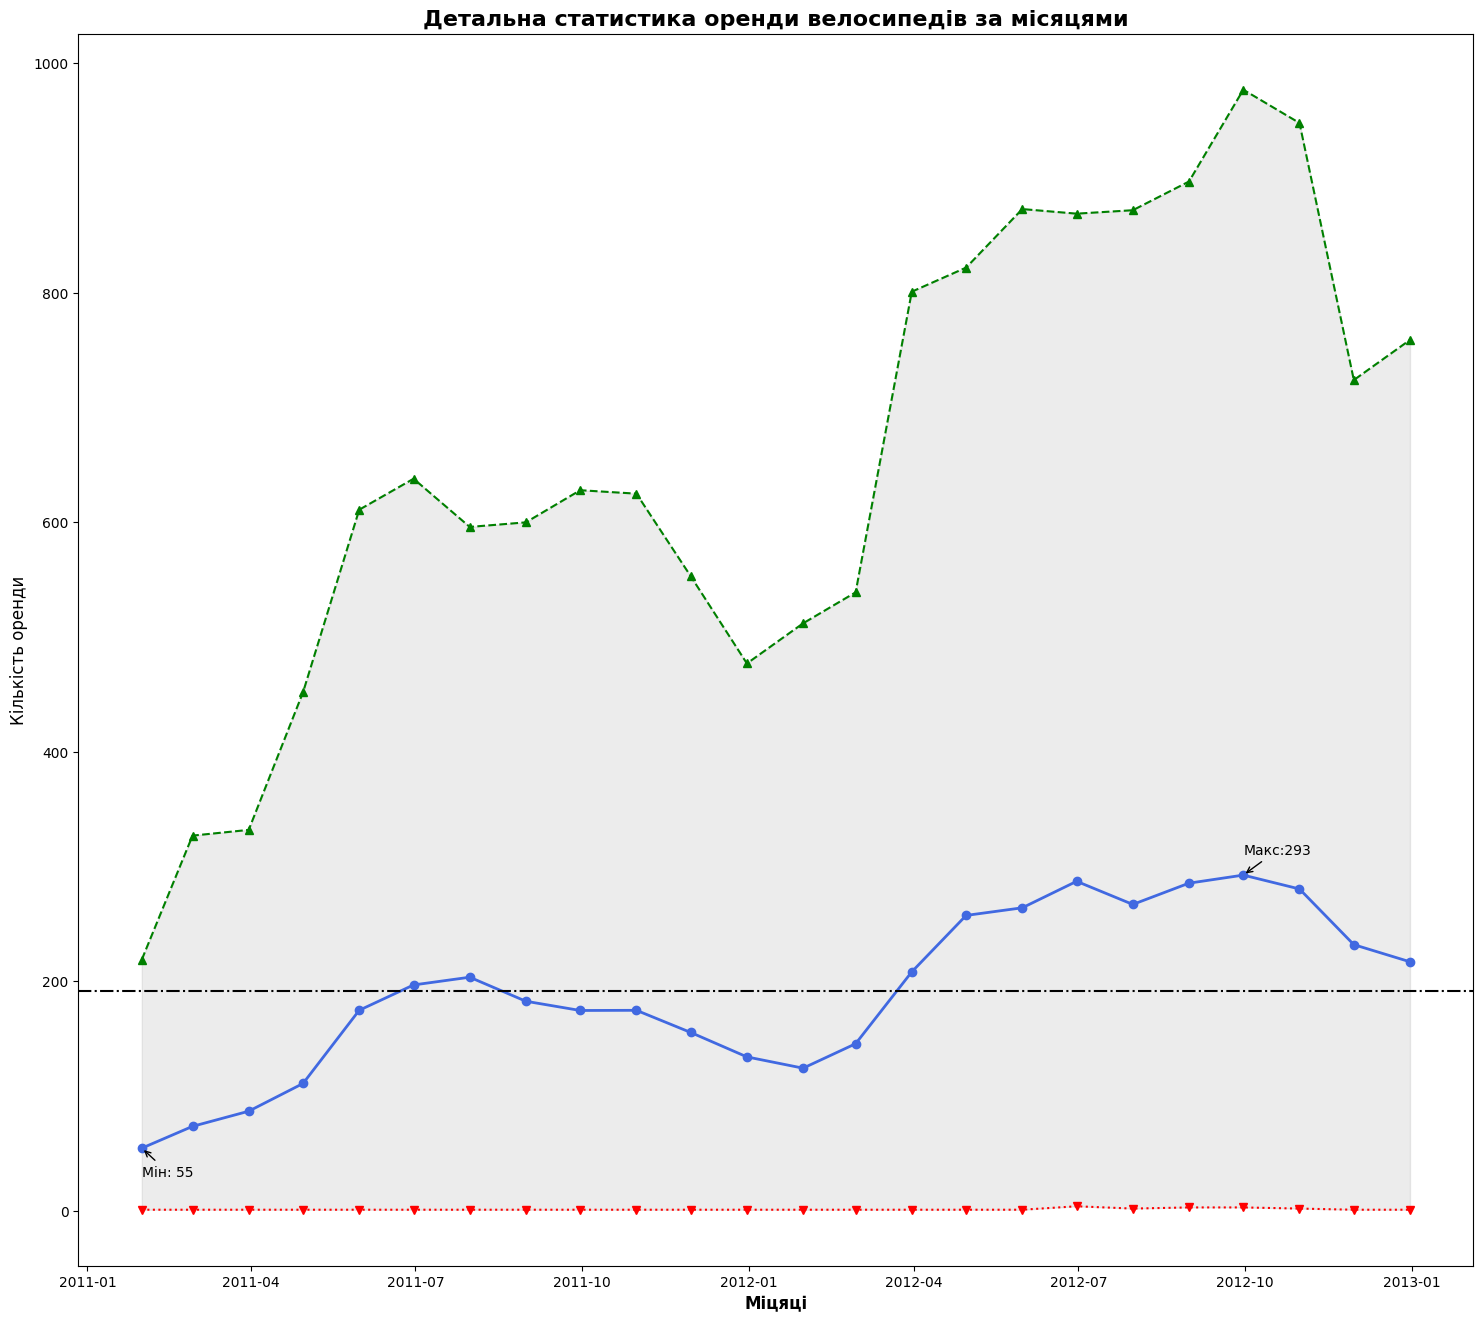

In [14]:
plt.figure(figsize=(18, 16))
monthly = df['count'].resample('M').agg(['mean', 'max', 'min'])
plt.plot(
    monthly.index,
    monthly['mean'],
    label='Середнє',
    color='royalblue',
    marker='o',
    linewidth=2
    )

plt.plot(
    monthly.index,
    monthly['max'],
    label='Максимум',
    color='green',
    linestyle='--',
    marker='^'
    )

plt.plot(
    monthly.index,
    monthly['min'],
    label='Мінімум',
    color='red',
    linestyle=':',
    marker='v'
)
overrall_mean = df['count'].mean()
plt.axhline(
    overrall_mean,
    color='black',
    linestyle='-.',
    linewidth=1.5,
    label=f'Середнє за період: {overrall_mean:.0f}'
)

plt.fill_between(
    monthly.index,
    monthly['min'],
    monthly['max'],
    color='gray',
    alpha=0.15,
    label='Діапазон'
)
max_mean_date = monthly['mean'].idxmax()
min_mean_date = monthly['mean'].idxmin()
plt.annotate(
    f"Макс:{monthly.loc[max_mean_date, 'mean']:.0f}",
    xy=(max_mean_date, monthly.loc[max_mean_date, 'mean']),
    xytext=(0, 15),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->')
)
plt.annotate(
    f"Мін: {monthly.loc[min_mean_date, 'mean']:.0f}",
    xy=(min_mean_date, monthly.loc[min_mean_date, 'mean']),
    xytext=(0, -20),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->')
)

plt.title('Детальна статистика оренди велосипедів за місяцями', fontsize=16, fontweight='bold')
plt.xlabel('Міцяці',fontsize=12, fontweight='bold')
plt.ylabel('Кількість оренди',fontsize=12, fontweght='bold')

plt.legend(shadow=True)
plt.tight_layot()
plt.show();